In [1]:
''' Importación de las librerias necesarias para el método '''

import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [4]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [7]:
''' Asignar variable en x; y en y'''

X = df.drop('Potability',axis=1).values
y = df['Potability'].values

''' Dividimos el conjunto de datos en un 70% para el entrenamiento y el otro 30% para la prueba '''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
''' Creamos un svm utilzando el kernel lineal '''

clf = svm.SVC(kernel='linear')

''' Entrenamos el modelo '''
clf.fit(X_train, y_train)

''' Predecimos la respuesta para el conjunto de datos de prueba '''

y_pred = clf.predict(X_test)

In [11]:
''' Procedemos a evaluar el modelo '''

''' Mide el accuracy del modelo '''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

''' Medimos la precision para determinar el rendimiento del modelo '''
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

''' Medimos el recall el cual nos ayuda a detectar los elementos relevantes '''
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

'''  Calcular la matriz de confusión '''
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.5798575788402849
Precision: 0.28992878942014244
Recall: 0.5


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[570,   0],
       [413,   0]], dtype=int64)

Text(30.5, 0.5, 'ACTUAL')

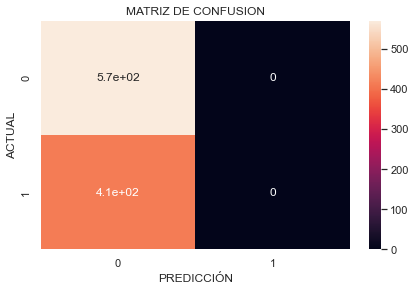

In [12]:
'''  Dibujar la matriz de confusión '''
sns.set()
f, ax=plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax)
ax.set_title('MATRIZ DE CONFUSION'), plt.tight_layout()
ax.set_xlabel('PREDICCIÓN')
ax.set_ylabel('ACTUAL')